In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#ASSIGNMENT 1: KMEANS (BORIS), not working

X=np.array([[1,3,3],[1,2,3],[5,4,3]])
k=2
m=5
    
#init centroids as random data points
rand_samples=np.random.choice(X.shape[0],size=(k,),replace=False) #choose k random data points as centroids
mu=X[rand_samples] #centroid initialisation

r=np.zeros(X.shape[0]) #current memberships
r_=r #prev memberships


for i in range(m):
    for count, datapoint in enumerate(X):
        D = np.linalg.norm(mu-datapoint,axis=0)#calc dist
        print('shape',D.shape)
        r[count]=np.argmin(D,axis=0) #assign membership
        
        print(D)
        print(r)
        
    # assign a rand datapoint to any empty centroids (empty centroids workaround)
    r_empty = [x for x in range(k) if x not in np.unique(r)]
    #print('r_empty',r_empty)
    for m in r_empty:
        r[np.random.randint(0,len(X)-1)] = m
    #print('r_empty2',r_empty)
    
    #print('np.unique\n',np.unique(r.astype(int)))
    
    #calc new centroids
    mu.T[np.unique(r.astype(int))]=[np.mean(X[r==j],axis=1) for j in np.unique(r)]
    
    #calc loss
    loss=np.sum([np.sum((X[r==j,:] - mu[:,j.astype(int)])**2) for j in np.unique(r)])
    
    #printouts
    print('Iteration:' + i)
    print('Memberships' + str(list(r == r_).count(False)))
    print('Loss function' + str(loss))
    
    #end if all memberships same as previous iteration
    if (r==r_).all():
        break
    
    r_=r
    
print('Final centroids\n',mu.T)
print('Final memberships\n',r)
print('Final loss\n',loss)
    
    

shape (3,)
[0. 1. 0.]
[0. 0. 0.]
shape (3,)
[0. 1. 0.]
[0. 0. 0.]
shape (3,)
[5.65685425 2.23606798 0.        ]
[0. 0. 2.]


ValueError: operands could not be broadcast together with shapes (1,3) (2,) 

In [3]:
#ASSIGNMENT 1: LEO'S 
def kmeans(X, k, max_iter=100): 
    """ Performs k-means clustering

    Input:
    X: (d x n) data matrix with each datapoint in one column
    k: number of clusters
    max_iter: maximum number of iterations

    Output:
    mu: (d x k) matrix with each cluster center in one column
    r: assignment vector
    """
    # initailize k random centroids at data mean
    X_mean = np.mean(X, axis = 0)
    w_init = np.array([np.random.normal(X_mean[i],1,k) for i in range(len(X_mean))])
    w_q = w_init
    converged = False
    iteration = 1
    m_q = np.zeros(len(X))
    m_q_old = deepcopy(m_q)
    while (not converged) & (iteration <= max_iter):
        # calculate distance to centroids
        D = np.linalg.norm(X[None, :] - w_q.T[:,None], axis = 2)
        # assign every data point to its nearest centroids
        m_q = np.argmin(D, axis=0)
        # assign random data point to not empty centroids
        m_empty = [x for x in range(k) if x not in np.unique(m_q)]
        for m in m_empty:
            m_q[random.randint(0,len(X)-1)] = m
        # calculate position of centroids as mean of assigned data
        w_q.T[np.unique(m_q)] = [np.sum(X[m_q == j], axis = 0) / (np.sum(m_q == j)) for j in np.unique(m_q)]
        
        # calculate objective
        loss = np.sum([np.sum((X[m_q == j, :] - w_q[:,j])**2) for j in np.unique(m_q)])
        print('iteration-step: ' + str(iteration))
        print('number of changes in assignment: ' + str(list(m_q == m_q_old).count(False)))
        print('loss function value: ' + str(loss))
        if (m_q == m_q_old).all():
            converged = True
            break
        
        m_q_old = deepcopy(m_q)
        iteration+=1
    return w_q.T, m_q, loss

In [4]:
#Assignment 4

In [5]:
def norm_pdf(X, mu, C): #not correct ~ old version, see below
    """
    This function computes the probability density function when given a multivariate gaussian distribution as an input.
    
    Input:
    X=data (nxd)
    mu=centre of Gaussian distribution (1xd)
    C=covariance matrix (nxn) , np.cov(X.T)
    
    Output:
    y=probability density function (nx1)
    """
    
    det=np.linalg.det(np.linalg.inv(C)) #1x1
    
    frac = 1 / (2**(X.shape[1]/2) * np.sqrt(det)) #1x1 
    
    exp = np.exp((-1/2) * np.dot( np.dot((X-mu),np.linalg.inv(C)) , (X-mu).T)) #nxd dxd dxn = nxn 
    exp = np.diagonal(exp) #we only want diagonals, since only x_i should affect y_i
    
    y = frac * exp
    
    return y
    

In [6]:
#DEV CELL

#why does np.cov return nxn not dxd?? -->docs
#"A 1-D or 2-D array containing multiple variables and observations. 
#Each row of m represents a variable, and each column a single observation of all those variables. Also see rowvar below."
# TL;DR ----->transpose data before handing it to np.cov

X = np.array([[0,11],[10,1],[-5,50]])
print(X)
print(X.shape)

C=np.cov(X.T) #dxd , transpose is to rectify weird np.cov function
mu=np.mean(X,axis=1) #1xd
print(mu.shape)
print(C)

det=np.linalg.det(np.linalg.inv(C))
print(det)

frac = 1 / (2**(X.shape[1]/2) * np.sqrt(det)) #1x1 
print(frac)

exp = np.exp((-1/2) * np.dot( np.dot((X-mu),np.linalg.inv(C)) , (X-mu).T)) #nxd dxd dxn = nxn --> check this with Jakob
#the sheet2.pdf formula says to transpose the first (X-mu)
print(exp)
exp = np.diagonal(exp) #we only want diagonals, since only x_i should affect y_i

print(exp.shape)


y = frac * exp





print(np.linalg.det(C))
print(np.sqrt(np.linalg.det(C)))


print(y)

[[ 0 11]
 [10  1]
 [-5 50]]
(3, 2)
(3,)
[[  58.33333333 -171.66666667]
 [-171.66666667  670.33333333]]
0.00010380622837370248
49.07477288111818


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [7]:
X = np.array([[7,11],[10,1],[-5,5]])

y=norm_pdf(X,np.mean(X,axis=0),np.cov(X.T))

print(y)

[10.22654216 10.22654216 10.22654216]


In [8]:
#DEV 2 CELL: VAR METHOD ---> WORKS 
#not 100% accurate (see comparison below), but pretty good.
def norm_pdf(X, mu, C):
    """
    This function computes the probability density function when given a multivariate gaussian distribution as an input.
    
    Input:
    X=data (nxd)
    mu=centre of Gaussian distribution (1xd)
    C=covariance matrix (nxn) , np.cov(X.T)
    
    Output:
    y=probability density function (nx1)
    """

    var=np.diagonal(C) #trace of cov matrix is var
    
    det=np.linalg.det(C)

    #frac = 1 / (2**(X.shape[1]/2) * np.sqrt(var))  
    
    #frac = 1 / (((2*np.pi)**(X.shape[1]/2))*np.sqrt(det))
    
    frac = 1 / ((np.power((2*np.pi),(X.shape[1]/2)))*np.sqrt(det))
    
    exp = np.exp( (-1/2) *  (np.dot((np.square(X-mu)), 1/(var))) )
    
    #exp = np.exp( (-1/2) *  (np.dot((np.dot((X-mu).T,(X-mu))), 1/(var))) )
    
    #exp = np.exp( (-1/2) *  (np.dot(((X-mu)**2), 1/(var))) )
    
    #exp = np.exp(-((X-mu.reshape(1,mu.shape[0]))**2)/(2*var))

    y = frac*exp

    return y

In [9]:
X = np.array([[7,11],[10,1],[-5,5],[1,2],[99,1]])
mu = np.mean(X,axis=0)
C = np.cov(X.T)

var=np.diagonal(C) #trace of cov matrix is var
    
det=np.linalg.det(C)

print(det)


frac = 1 / (((2*np.pi)**(X.shape[1]/2))*np.sqrt(det))

exp = np.exp( (-1/2) *  (np.dot(((X-mu)**2), 1/(var))) )

print(np.diagonal(C).shape)
#print(np.dot(((X-mu.reshape(1,mu.shape[0]))**2),(1/2*np.diagonal(C))))
print(exp)

print(frac*exp)

28525.837500000012
(2,)
[0.24059709 0.74737907 0.79544001 0.79154369 0.1617739 ]
[0.00022672 0.00070427 0.00074956 0.00074589 0.00015244]


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

y=norm_pdf(X,mu,C)
print("Our output")
print(y) 

y = multivariate_normal.pdf(X, np.mean(X,axis=0), np.cov(X.T))
print("Correct output")
print(y)

X=np.array([[0,0],[1,3],[4,6],[-1,1],[0.5,1],[0.5,2],[1,7],[5,1],[7,1],[9,7]])
print(X.shape)

y = multivariate_normal.pdf(X, np.mean(X,axis=0), np.cov(X.T))
print("Correct output")
print(y)

z = norm_pdf(X,np.mean(X,axis=0),np.cov(X.T))
print("Our output")
print(z)

Our output
[0.00022672 0.00070427 0.00074956 0.00074589 0.00015244]
Correct output
[0.00023031 0.00060937 0.00077062 0.00064296 0.0001957 ]
(10, 2)
Correct output
[0.00970558 0.01602077 0.00982328 0.00977784 0.0134664  0.01508864
 0.0030866  0.00871177 0.00366591 0.00223946]
Our output
[0.00771902 0.01650381 0.00912485 0.00802926 0.01188255 0.01434514
 0.00533104 0.01164806 0.0064915  0.00104459]


In [11]:
#ASSIGNMENT 6

(9, 2)


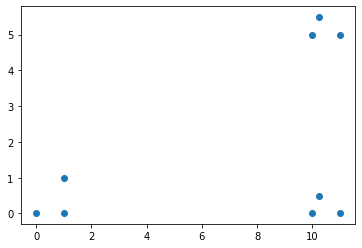

In [142]:
#from test.py
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
            [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
print(X.shape)
perfect_r = [1,0,1,2,2,1,2,2,2]

plt.scatter(X.T[0],X.T[1]) #this shows the clusters, for inspection checking EMM algorithm

In [147]:
#EMM ALGORITHM DEV CELL
k=3
max_iter=10
init_kmeans=False
tol=0.00001


#1. INITIALISATIONS
pi = np.full(shape=(k,1), fill_value=1/k) #kx1
rand_samples = np.random.choice(X.shape[0], size=(k,), replace=False) #choose k random data points
mu = X[rand_samples] #centroid initialisation as random points, kxd
sigma = [np.eye(X.shape[1]) for i in range(k)] #dxd
likelihoods = np.empty(shape=(X.shape[0],k)) #nxk

converged = False
iteration = 1
while (not converged) & (iteration <= max_iter):
    
    print('Iteration Number:\n',iteration)
    
    #2. E-STEP - compute new likelihoods and responsibilities
    old_likelihoods = likelihoods
    print('Old likelihoods\n', old_likelihoods)
    #2.1 first find all k likelihoods
    for i in range(k):
        #nx1                             1x1 X nx1  = nx1 
        likelihood = (pi[i] * norm_pdf(X,mu[i],sigma[i])) #norm_pdf written to handle mu=(1xd) only
        likelihoods.T[i]=likelihood
    print('New likelihoods\n',likelihoods)
    
    #2.2 use likelihoods to calculate individual k responsibilities
        #nxk            nxk              nx1
    responsibilities = likelihoods / np.sum(likelihoods, axis=1).reshape(likelihoods.shape[0],1)
    print('Responsibilities:\n',responsibilities)
    
    #3. M-STEP - compute new n,pi,mu,sigma
    #1xk
    n = np.sum(responsibilities,axis=0)
    print('n\n',n)
    #1xk
    pi = n / np.sum(n,axis=0)
    print('pi\n',pi)
    #kxd                    (nxkx0)x(nx0xd)=nxkxd --> kxd / kx1
    mu = np.sum(responsibilities[:,:,None]*X[:,None,:],axis=0)/n.reshape(n.shape[0],1)
    print('mu\n',mu)
    #return sigma as list of k dxd matrices
    #kxdxd         =  sum ((nxkx0x0)     x    (nxkxdx0)x(nxkx0xd)) = nxkxdxd-->kxdxd/kx0x0
    sigma = np.sum(responsibilities[:,:,None,None]*(X[:,None,:,None]-mu[None,:,:,None])*(X[:,None,None,:]-mu[None,:,None,:]),axis=0) / n[:,None,None]
                                                #   (nx0xdx0-nxkx0x0)-->(nxkxdx0)
    #print('sigma\n',sigma)
    
    #break condition
    if (old_likelihoods-likelihoods).all()<tol:
        converged=True

    iteration=iteration+1
                          
    
                          
                       

Iteration Number:
 1
Old likelihoods
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
New likelihoods
 [[2.81762195e-28 1.05002998e-33 1.95166105e-02]
 [1.02323357e-23 3.81323665e-29 3.21774509e-02]
 [6.20622535e-24 3.43256624e-27 5.30516477e-02]
 [3.21774509e-02 1.19914199e-07 8.29134753e-20]
 [3.53400162e-02 1.60443425e-06 1.23239879e-20]
 [5.30516477e-02 1.97705091e-07 6.20622535e-24]
 [1.19914199e-07 3.21774509e-02 4.58581473e-23]
 [1.08105929e-08 3.53400162e-02 5.59508184e-25]
 [1.97705091e-07 5.30516477e-02 3.43256624e-27]]
Responsibilities:
 [[1.44370456e-26 5.38018616e-32 1.00000000e+00]
 [3.17997090e-22 1.18506486e-27 1.00000000e+00]
 [1.16984592e-22 6.47023493e-26 1.00000000e+00]
 [9.99996273e-01 3.72663928e-06 2.57674751e-18]
 [9.99954602e-01 4.53978687e-05 3.48710322e-19]
 [9.99996273e-01 3.72663928e-06 1.16984156e-22]
 [3.72663928e-06 9.99996273e-01 1.42515877e-21]
 [3.05902227e-07 9.99999694e-01 1.58321380e-23]


In [214]:
def em_gmm(X, k, max_iter=100, init_kmeans=False, tol=0.00001):
    
    if init_kmeans==True:
        #1.a INIT_KMEANS
        mu, r, _ = kmeans(X,k)
        unique, counts = np.unique(r, return_counts=True)
        pi = counts/np.sum(counts)
        
    else:
        #1.b RANDOM INITIALISATIONS
        pi = np.full(shape=(k,1), fill_value=1/k) #kx1
        rand_samples = np.random.choice(X.shape[0], size=(k,), replace=False) #choose k random data points
        mu = X[rand_samples] #centroid initialisation as random points, kxd
    
    
    #setup storage and loop
    sigma = [np.eye(X.shape[1]) for i in range(k)] #dxd
    #sigma = np.array((np.eye(X.shape[1],k)))
    print(np.shape(sigma))
    likelihoods = np.empty(shape=(X.shape[0],k)) #nxk
    converged = False
    iteration = 1
    while (not converged) & (iteration <= max_iter):
    
        print('Iteration Number:\n',iteration)
    
        #2. E-STEP - compute new likelihoods and responsibilities
        old_likelihoods = likelihoods
        print('Old likelihoods\n', old_likelihoods)
        #2.1 first find all k likelihoods
        for i in range(k):
            #nx1                             1x1 X nx1  = nx1 
            likelihood = (pi[i] * norm_pdf(X,mu[i],sigma[i])) #norm_pdf written to handle mu=(1xd) only
            likelihoods.T[i]=likelihood
        print('New likelihoods\n',likelihoods)
    
        #2.2 use likelihoods to calculate individual k responsibilities
            #nxk            nxk              nx1
        responsibilities = likelihoods / np.sum(likelihoods, axis=1).reshape(likelihoods.shape[0],1)
    
        #3. M-STEP - compute new n,pi,mu,sigma
        #1xk
        n = np.sum(responsibilities,axis=0)
        #1xk
        pi = n / np.sum(n,axis=0)
        #kxd                    (nxkx0)x(nx0xd)=nxkxd --> kxd / kx1
        mu = np.sum(responsibilities[:,:,None]*X[:,None,:],axis=0)/n.reshape(n.shape[0],1)
        #kxdxd         =  sum ((nxkx0x0)     x    (nxkxdx0)x(nxkx0xd)) = nxkxdxd-->kxdxd/kx0x0
        sigma = np.sum(responsibilities[:,:,None,None]*(X[:,None,:,None]-mu[None,:,:,None])*(X[:,None,None,:]-mu[None,:,None,:]),axis=0) / n[:,None,None]
                                                    #   (nx0xdx0-nxkx0x0)-->(nxkxdx0)
    
        #break condition
        if (old_likelihoods-likelihoods).all()<tol:
            converged=True

        iteration=iteration+1
        
    list_sigma=[sigma[i,:,:] for i in range(k)]
    return pi, mu, list_sigma, likelihoods

(9, 2)


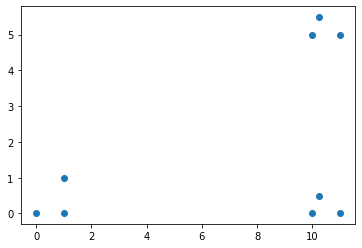

In [215]:
#from test.py
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
            [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
print(X.shape)
perfect_r = [1,0,1,2,2,1,2,2,2]

plt.scatter(X.T[0],X.T[1]) #this shows the clusters, for inspection checking EMM algorithm

In [216]:
pi, mu, sigma, loglik = em_gmm(X,k=3,tol=0.00001)

(3, 2, 2)
Iteration Number:
 1
Old likelihoods
 [[7.18422730e-25 3.21774509e-02 2.19767180e-31]
 [1.23239879e-20 5.30516477e-02 3.76993649e-27]
 [1.23239879e-20 3.21774509e-02 5.59508184e-25]
 [4.53774790e-02 1.36701210e-19 1.38810761e-08]
 [5.30516477e-02 1.23239879e-20 1.97705091e-07]
 [3.53400162e-02 1.02323357e-23 1.08105929e-08]
 [2.06013436e-06 5.09437999e-25 4.53774790e-02]
 [1.97705091e-07 3.76993649e-27 5.30516477e-02]
 [1.60443425e-06 3.81323665e-29 3.53400162e-02]]
New likelihoods
 [[1.05002998e-33 2.19767180e-31 1.02323357e-23]
 [3.81323665e-29 3.76993649e-27 1.36701210e-19]
 [3.43256624e-27 5.59508184e-25 8.29134753e-20]
 [1.19914199e-07 1.38810761e-08 5.30516477e-02]
 [1.60443425e-06 1.97705091e-07 4.53774790e-02]
 [1.97705091e-07 1.08105929e-08 3.21774509e-02]
 [3.21774509e-02 4.53774790e-02 1.97705091e-07]
 [3.53400162e-02 5.30516477e-02 1.38810761e-08]
 [5.30516477e-02 3.53400162e-02 1.19914199e-07]]


In [217]:
sigma

[array([[ 0.19699046, -0.03456845],
        [-0.03456845,  0.05137557]]), array([[ 0.15593606, -0.01817456],
        [-0.01817456,  0.05896388]]), array([[23.96702452, -0.36457296],
        [-0.36457296,  0.14584885]])]

In [218]:
r=[0,1,2,1,1,2,1,0,0,0]
unique, counts = np.unique(r, return_counts=True)
print(counts/np.sum(counts))

[0.4 0.4 0.2]
